# 🧠 Clasificación de candidatos con *Machine Learning*

## Introducción 📌
Se sigue un flujo de trabajo clásico de Machine Learning: carga y limpieza del dataset, preprocesamiento de variables, entrenamiento de modelos, evaluación y guardado.

🐼 1. Carga de librerías

- Se importa la librería **Pandas**, la cual será utilizada para cargar, limpiar y manipular el dataset de candidatos.

In [74]:
import pandas as pd

📄 2. Cargar el dataset y eliminar duplicados
- Se carga el archivo `candidatos.csv` como un DataFrame.
- Se eliminan las filas duplicadas para evitar sesgo en el modelo.

In [75]:
data = pd.read_csv("candidatos.csv")
data.drop_duplicates(inplace=True)

⚙️ 3. Importar herramientas de preprocesamiento
- Se importan herramientas para escalar variables numéricas y codificar variables categóricas.

In [76]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

🏷️ 4. Definición de categorías para encoding ordinal
- Se define el orden lógico para las variables categóricas **Educación** y **Aptitud** para que sean codificadas de forma ordinal.

In [77]:
educacion = ["Ninguna","Tecnicatura","Licenciatura","Ingeniería"]
aptitud = ["No apto", "Apto"]

🔄 5. Preprocesamiento del dataset
- `MinMaxScaler`: Escala la **Experiencia** entre 0 y 1.
- `OrdinalEncoder`: Codifica **Educación** y **Aptitud** según el órden definido.
- `OneHotEncoder`: Codifica la variable **Área** en múltiples columnas binarias.

In [78]:
mms = MinMaxScaler()
edu_encoder = OrdinalEncoder(categories=[educacion])
apt_encoder = OrdinalEncoder(categories=[aptitud])
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

- Se transforman las columnas mencionadas aplicando los métodos de escalado y codificación.

In [79]:
data[["Experiencia"]] = mms.fit_transform(data[["Experiencia"]])
data[["Aptitud"]] = apt_encoder.fit_transform(data[["Aptitud"]])
data[["Educación"]] = edu_encoder.fit_transform(data[["Educación"]])

- Se codifica la columna **Área** con One-Hot Encoding, se concatenan las nuevas columnas y se elimina la original.

In [80]:
area_encoded = ohe.fit_transform(data[["Área"]])
data = pd.concat([data, area_encoded], axis=1).drop(columns=["Área"])

- Se renombran las columnas generadas por ``OneHotEncoder`` para hacerlas más legibles.

In [81]:
data.rename(columns={
    "Área_Desarrollo Móvil": "Desarrollo Movil",
    "Área_Desarrollo Web": "Desarrollo Web",
    "Área_Desarrollo de Juegos": "Desarrollo de Juegos",
    },
    inplace=True
)

🎯 6. División de variables predictoras y objetivo
- `x`: Variables independientes o predictores
- `y`: Variable dependiente u objetivo (**Aptitud**)

In [82]:
x = data.drop(columns=["Puntos","Aptitud"])
y = data["Aptitud"]

✂️ 7. División de datos en entrenamiento y prueba
Se dividen los datos en:
- **Entrenamiento** (70%)
- **Prueba/validación** (30%) <br/>
Usando una semilla (`random_state=42` para reproducibilidad.)

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

🧪 8. Definición de modelos de ML
Se importan dos algorítmos:
- Regresión Logística
- Árbol de Decisión

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Se crean los modelos y un diccionario para almacenar sus métricas de desempeño.

In [85]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
}

accuracy_scores = {}

📊 9. Evaluación, impresión y guardado de modelos
Se importa la métrica de **exactitud** (`acuracy_score`) y la función para guardar los modelos entrenados (`dump`)

In [86]:
from sklearn.metrics import accuracy_score
from joblib import dump

Para cada modelo:
1. Se entrena (`fit`).
2. Se predice sobre los datos de prueba.
3. Se calcula la **exactitud** y se guarda.
4. Se imprime el desempeño del modelo tanto en entrenamiento como en validación, además de comparar los valores reales con los predichos.
5. Cada modelo se guarda como archivo `.joblib` en la carpeta `../models/`.

In [87]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    
    print(f'Accuracy of {model_name} on test data: {accuracy}')
    print(f"Exactitud promedio entrenamiento: {model.score(x_train,y_train)}")
    print(f"Exactitud promedio validación: {model.score(x_test, y_test)}")
    print("Datos reales:\n", y_test)
    print("Datos predichos:\n", y_pred)
    
    with open(f"../models/{model_name}.joblib", "wb") as f:
        dump(model, f)

Accuracy of LogisticRegression on test data: 0.9144654088050315
Exactitud promedio entrenamiento: 0.9212725802102992
Exactitud promedio validación: 0.9144654088050315
Datos reales:
 23847    0.0
12063    0.0
842      1.0
330      0.0
9422     1.0
        ... 
25233    1.0
13333    1.0
24840    0.0
25226    1.0
3118     0.0
Name: Aptitud, Length: 1590, dtype: float64
Datos predichos:
 [0. 0. 1. ... 0. 1. 0.]
Accuracy of DecisionTreeClassifier on test data: 0.9540880503144654
Exactitud promedio entrenamiento: 1.0
Exactitud promedio validación: 0.9540880503144654
Datos reales:
 23847    0.0
12063    0.0
842      1.0
330      0.0
9422     1.0
        ... 
25233    1.0
13333    1.0
24840    0.0
25226    1.0
3118     0.0
Name: Aptitud, Length: 1590, dtype: float64
Datos predichos:
 [0. 0. 1. ... 0. 1. 0.]


Se imprime por consola el mejor modelo.

In [88]:
mejor_modelo = max(accuracy_scores, key=accuracy_scores.get)
print("\n🔍 El mejor modelo fue:", mejor_modelo)
print("✅ Exactitud:", accuracy_scores[mejor_modelo])


🔍 El mejor modelo fue: DecisionTreeClassifier
✅ Exactitud: 0.9540880503144654


#### Tabla comparativa de los modelos

In [89]:
resultados_df = pd.DataFrame.from_dict(
    accuracy_scores, orient="index", columns=["Exactitud"]
).sort_values(by="Exactitud", ascending=False)
print("\n📊 Comparativa de modelos:")
resultados_df


📊 Comparativa de modelos:


,Exactitud
DecisionTreeClassifier,0.954088
LogisticRegression,0.914465


In [90]:
print(f"\n🔍 El mejor modelo fue: {mejor_modelo} con una exactitud de {resultados_df.loc[mejor_modelo, 'Exactitud']:.4f}")


🔍 El mejor modelo fue: DecisionTreeClassifier con una exactitud de 0.9541


📊 Visualización Comparativa de Modelos con Seaborn
Se importan las librerías necesarias para la visualización:
- `seaborn` para gráficos estadísticos.
- `matplotlib.pyplot` para personalizar la visualización.

/tmp/ipykernel_3893/2139502702.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


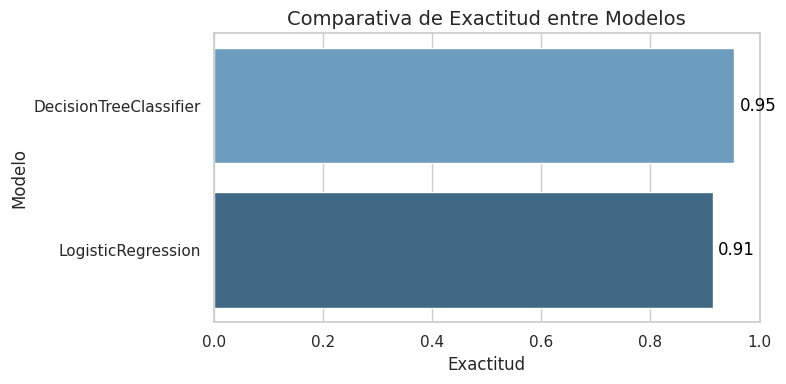

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo
sns.set(style="whitegrid")

# Crear gráfica
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    x=resultados_df["Exactitud"],
    y=resultados_df.index,
    palette="Blues_d"
)

# Añadir etiquetas
plt.title("Comparativa de Exactitud entre Modelos", fontsize=14)
plt.xlabel("Exactitud")
plt.ylabel("Modelo")
for i, v in enumerate(resultados_df["Exactitud"]):
    ax.text(v + 0.01, i, f"{v:.2f}", color="black", va="center")

plt.xlim(0, 1)
plt.tight_layout()
plt.show()